In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [16]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
data1["target"].unique()

array([0., 1., 2.])

In [18]:
df = data1.loc[(data1['target'] == 0) | (data1['target'] == 1)]

In [19]:
df["target"].unique()

array([0., 1.])

In [20]:
X = df.drop("target", axis=1)
y = df["target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

TO SCREEN:
- XGBoost
- Random Forest
- Decision Tree
- Bagging
- LightGBM
- SVM
- KNN
- Naive Bayes
- Logistic Regression
- BaseModel

EVALUATION TO DO:
- Confusion Matrix
- Accuracy
- F1 Score
- Sensitivity
- Specificity
- ROC Curve
- ROC AUC score

In [1]:
import data_prep
import pandas as pd
data = pd.read_csv("marketing_campaign.csv", sep = ";")

In [2]:
import random
random.seed()
X_train, y_train, X_test, y_test = data_prep.prep_data(data)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pickle
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import sklearn.naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [6]:
def evaluate_model(actual, predicted, class_proba):
    cm = confusion_matrix(y_true = actual, y_pred = predicted)
    acc = accuracy_score(y_true = actual, y_pred = predicted) 
    f1 = f1_score(y_true = actual, y_pred = predicted)
    sensitivity = sensitivity_score(y_true = actual, y_pred = predicted)
    specificity = specificity_score(y_true = actual, y_pred = predicted)
    fpr, tpr, threshold = roc_curve(y_test, class_proba)
    roc_auc = auc(fpr, tpr)

    return cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc

In [7]:
def summarize_evaluation(cm, acc, f1, sensitivity, specificity, fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot = True, fmt="d")
    plt.title('Confusion Matrix')
    plt.show()
    print("Accuracy reached on test data:", acc)
    print("F1 score reached on test data:", f1)
    print("Sensitivity reached on test data:", sensitivity)
    print("Specificity reached on test data:", specificity)
    plt.figure(figsize=(8, 6))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Dummy Classifier

In [8]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
class_probabilities = dummy.predict_proba(X_test)
dummy_proba = class_probabilities[:, 1]
dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc = evaluate_model(y_test, dummy_pred, dummy_proba)

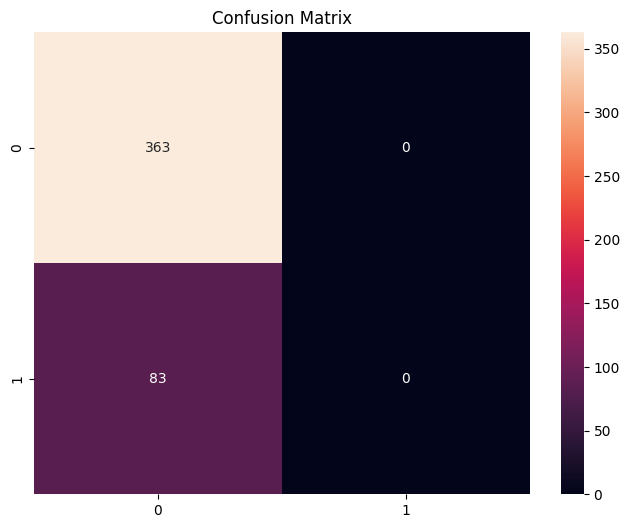

Accuracy reached on test data: 0.8139013452914798
F1 score reached on test data: 0.0
Sensitivity reached on test data: 0.0
Specificity reached on test data: 1.0


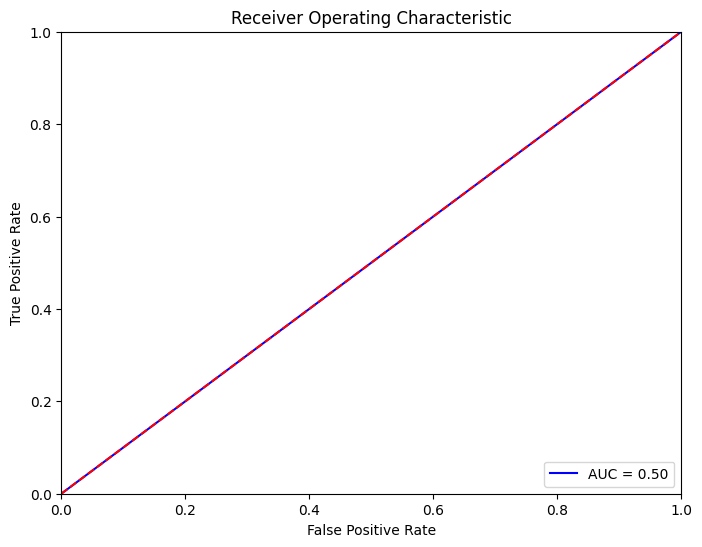

In [9]:
summarize_evaluation(dummy_cm, dummy_acc, dummy_f1, dummy_sensitivity, dummy_specificity, dummy_fpr, dummy_tpr, dummy_roc_auc)

### XGBoost

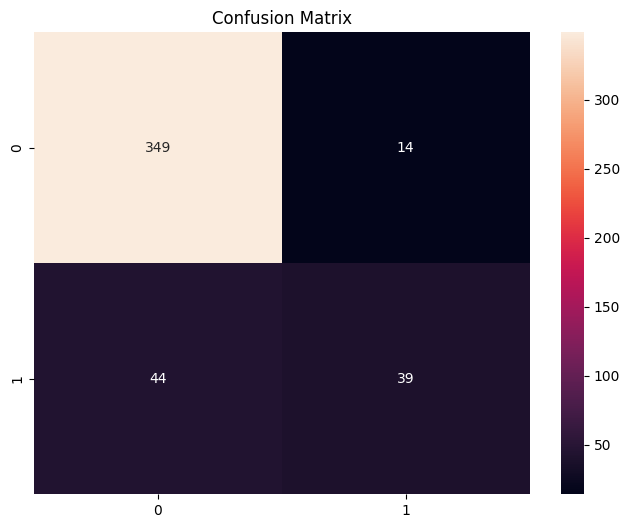

Accuracy reached on test data: 0.8699551569506726
F1 score reached on test data: 0.5735294117647058
Sensitivity reached on test data: 0.46987951807228917
Specificity reached on test data: 0.9614325068870524


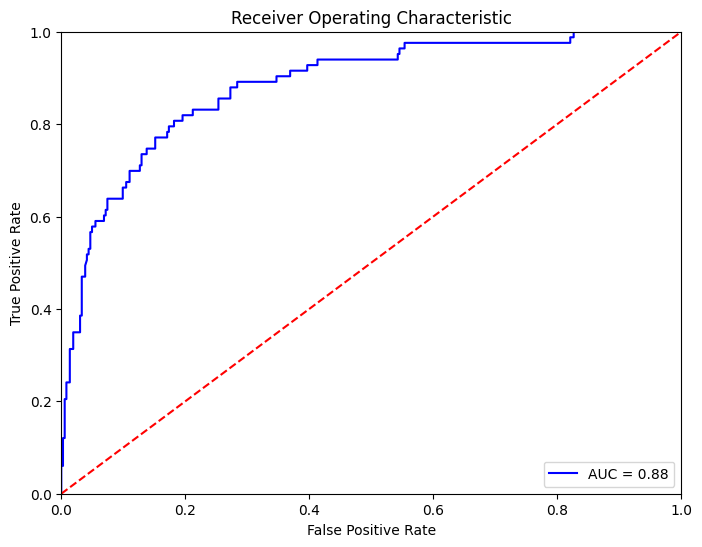

In [10]:
xgb = xgb.XGBClassifier(random_state = 2115)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
class_probabilities = xgb.predict_proba(X_test)
xgb_proba = class_probabilities[:, 1]
xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc = evaluate_model(y_test, xgb_pred, xgb_proba)
summarize_evaluation(xgb_cm, xgb_acc, xgb_f1, xgb_sensitivity, xgb_specificity, xgb_fpr, xgb_tpr, xgb_roc_auc)

### Random Forest

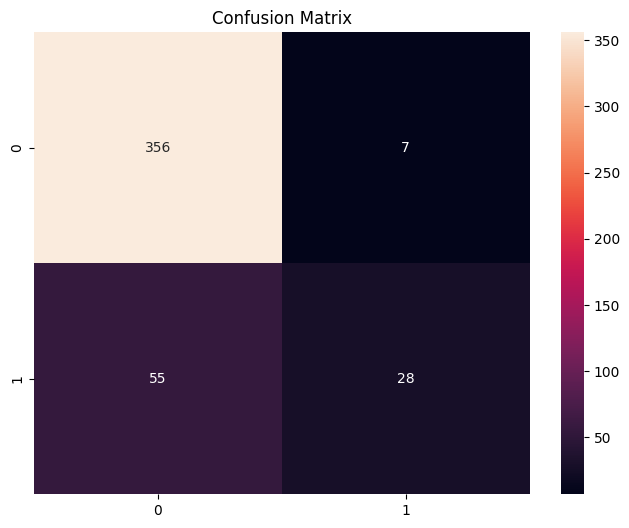

Accuracy reached on test data: 0.8609865470852018
F1 score reached on test data: 0.4745762711864407
Sensitivity reached on test data: 0.3373493975903614
Specificity reached on test data: 0.9807162534435262


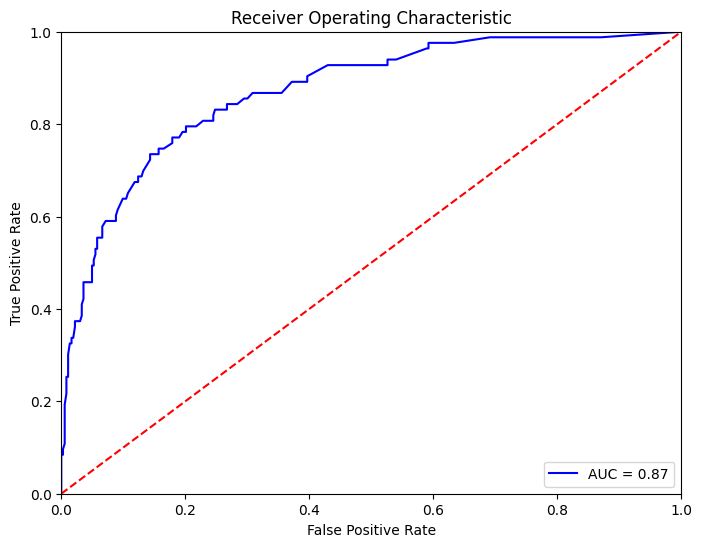

In [11]:
rf = RandomForestClassifier(random_state = 2115)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
class_probabilities = rf.predict_proba(X_test)
rf_proba = class_probabilities[:, 1]
rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc = evaluate_model(y_test, rf_pred, rf_proba)
summarize_evaluation(rf_cm, rf_acc, rf_f1, rf_sensitivity, rf_specificity, rf_fpr, rf_tpr, rf_roc_auc)

In [12]:
pickle.dump(rf, open('models/rf.pkl','wb'))

### Decision Tree

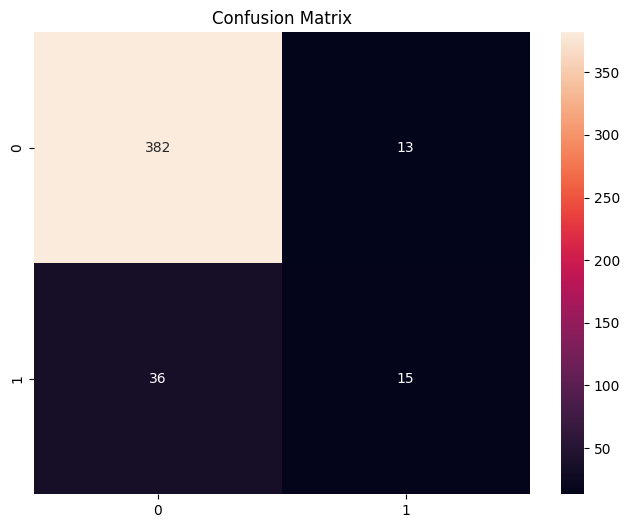

Accuracy reached on test data: 0.8901345291479821
F1 score reached on test data: 0.379746835443038
Sensitivity reached on test data: 0.29411764705882354
Specificity reached on test data: 0.9670886075949368


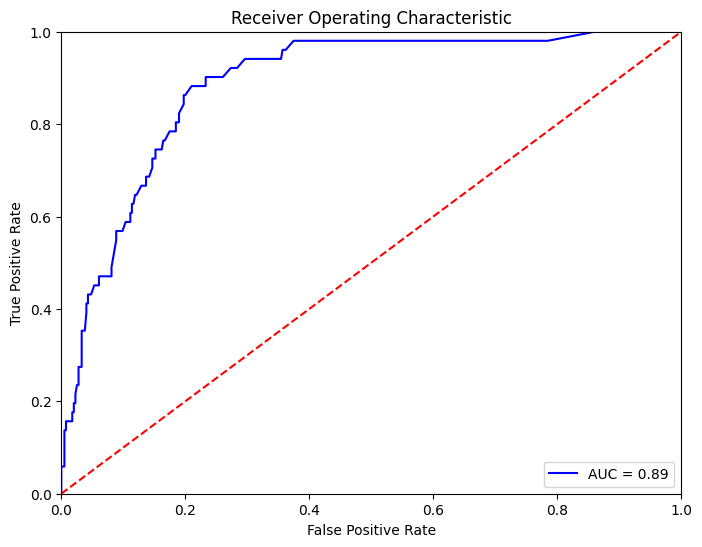

In [23]:
dt = DecisionTreeClassifier(random_state = 2115)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
class_probabilities = dt.predict_proba(X_test)
dt_proba = class_probabilities[:, 1]
dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc = evaluate_model(y_test, rf_pred, rf_proba)
summarize_evaluation(dt_cm, dt_acc, dt_f1, dt_sensitivity, dt_specificity, dt_fpr, dt_tpr, dt_roc_auc)

### Bagging

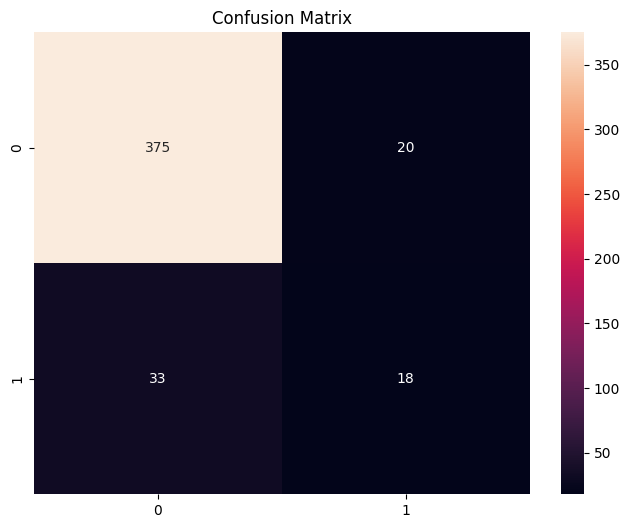

Accuracy reached on test data: 0.8811659192825112
F1 score reached on test data: 0.4044943820224719
Sensitivity reached on test data: 0.35294117647058826
Specificity reached on test data: 0.9493670886075949


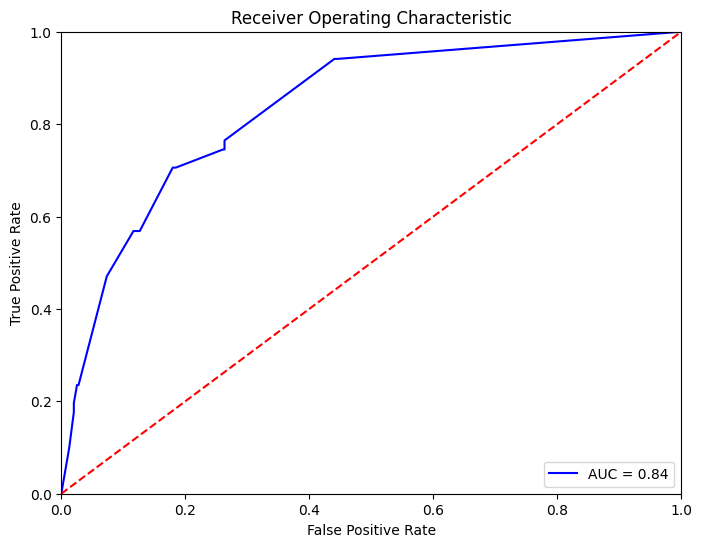

In [24]:
bg = BaggingClassifier(random_state = 2115)
bg.fit(X_train, y_train)
bg_pred = bg.predict(X_test)
class_probabilities = bg.predict_proba(X_test)
bg_proba = class_probabilities[:, 1]
bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc = evaluate_model(y_test, bg_pred, bg_proba)
summarize_evaluation(bg_cm, bg_acc, bg_f1, bg_sensitivity, bg_specificity, bg_fpr, bg_tpr, bg_roc_auc)

### LightGBM

[LightGBM] [Info] Number of positive: 280, number of negative: 1503
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1552
[LightGBM] [Info] Number of data points in the train set: 1783, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157039 -> initscore=-1.680429
[LightGBM] [Info] Start training from score -1.680429


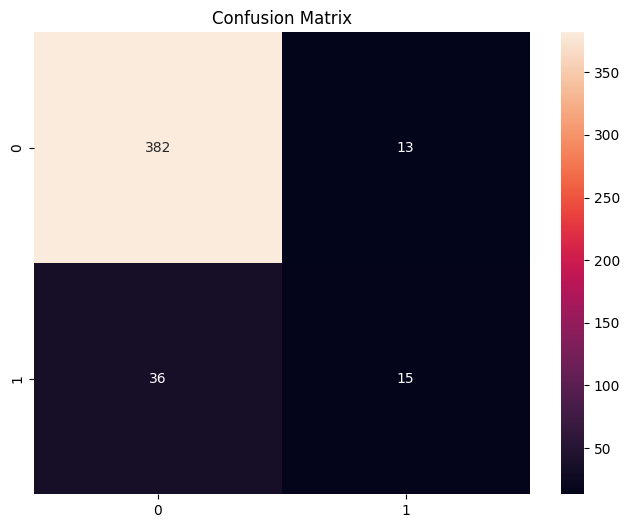

Accuracy reached on test data: 0.8901345291479821
F1 score reached on test data: 0.379746835443038
Sensitivity reached on test data: 0.29411764705882354
Specificity reached on test data: 0.9670886075949368


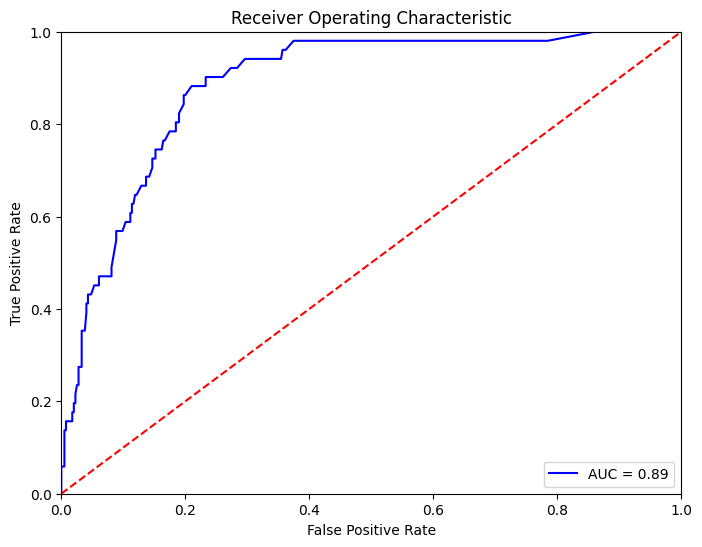

In [25]:
gbm = LGBMClassifier(random_state = 2115)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
class_probabilities = gbm.predict_proba(X_test)
gbm_proba = class_probabilities[:, 1]
gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc = evaluate_model(y_test, rf_pred, rf_proba)
summarize_evaluation(gbm_cm, gbm_acc, gbm_f1, gbm_sensitivity, gbm_specificity, gbm_fpr, gbm_tpr, gbm_roc_auc)

### SVM

In [26]:
svc = SVC(random_state = 2115, kernel = "poly")
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
class_probabilities = svc.predict_proba(X_test)
svc_proba = class_probabilities[:, 1]
svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc = evaluate_model(y_test, svc_pred, svc_proba)
summarize_evaluation(svc_cm, svc_acc, svc_f1, svc_sensitivity, svc_specificity, svc_fpr, svc_tpr, svc_roc_auc)

AttributeError: This 'SVC' has no attribute 'predict_proba'